## BMIF 804 Assignment 2


In [8]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

In [9]:
intra_mri = sitk.ReadImage("C:/Users/thish/Documents/804/Assign2/intraop_mri_new.nrrd")

print("Image size:", intra_mri.GetSize())
print("Image spacing:", intra_mri.GetSpacing())
print("Image origin:", intra_mri.GetOrigin())
print("Image direction:", intra_mri.GetDirection())
print("Image pixel type:", intra_mri.GetPixelIDTypeAsString())

Image size: (140, 280, 45)
Image spacing: (2.0, 1.0, 4.0)
Image origin: (-140.0, -139.5, -90.0)
Image direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Image pixel type: 32-bit signed integer


In [10]:
viewer = sitk.ImageViewer()
slicer_app_location = "C:\\Users\\thish\\AppData\\Local\\NA-MIC\\Slicer 5.0.2\\Slicer.exe"
viewer.SetApplication(slicer_app_location)

viewer.Execute(intra_mri)

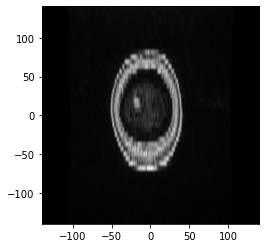

In [11]:
imSpacing =intra_mri.GetSpacing()
imSize= intra_mri.GetSize()
imOrigin=intra_mri.GetOrigin()

slice_num = 20
x0 =  imOrigin[0]
x1 =  imOrigin[0]+(imSpacing[0]*imSize[0])
y0 =  imOrigin[1]
y1 =  imOrigin[1]+(imSpacing[1]*imSize[1])
'''z0 =  imOrigin[2]
z1 =  imOrigin[2]+(imSpacing[2]*imSize[2])'''

corner_points = [intra_mri.TransformIndexToPhysicalPoint((0,0,slice_num)),
intra_mri.TransformIndexToPhysicalPoint((intra_mri.GetWidth(),0,slice_num)),
intra_mri.TransformIndexToPhysicalPoint((intra_mri.GetWidth(), intra_mri.GetHeight(),slice_num)),
intra_mri.TransformIndexToPhysicalPoint((0, intra_mri.GetHeight(), slice_num))]

mri_array = sitk.GetArrayFromImage(intra_mri[slice_num,:,:])
plt.imshow(mri_array, cmap='gray', extent=[x0,x1,y0,y1])
plt.show()
# plt.imshow(mri_array, cmap='gray', extent=[])


## Part 1c



In [12]:
# Part 1d:
def data_resample(img, new_spacing):
    resampler = sitk.ResampleImageFilter()
    resampled_mri = resampler.Execute(img)
    print()
    return resampled_mri

resampled_mri = data_resample(intra_mri, 0.5)

## Part 2:


In [13]:
rotate = sitk.Euler3DTransform()
rotate.SetRotation(0,0,-np.pi/2)

translation = sitk.TranslationTransform(3, (10,10,10))
translate = sitk.Euler3DTransform
translate.SetTranslation(translation.GetOffset())
# print(translation)


TypeError: SetTranslation() missing 1 required positional argument: 'translation'

In [15]:
interpol = sitk.sitkLinear
Rot_trans_mri = sitk.Resample(mri_array, interpol)

TypeError: in method 'ResampleImageFilter_SetReferenceImage', argument 2 of type 'itk::simple::Image const &'